#klasifikasi dataset penyakit jantung (Heart Disease) menggunakan metode KNN 
#kelompok 6 data mining 

# Import libary

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Memuat dataset
 

In [2]:
df=pd.read_csv("Heart.csv")
df_test=pd.read_csv("Heart.csv")

In [3]:
df_heart = pd.read_csv('heart.csv')
data_baru = np.array([90,1,3,145,233,1,0,120,0,2.3,0,0,1, ])  # Sesuaikan dengan jumlah fitur pada dataset

In [4]:
X = df_heart.drop('target', axis=1)  # Features
y = df_heart['target']   

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
k = 5  # Jumlah tetangga terdekat yang akan digunakan
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
prediksi_kelas = knn_model.predict([data_baru])


c:\Users\Lenov\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [8]:
#menampilkan 5 baris pertaman dari dataset kita
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Menganalisis Data 

Apa yang Anda coba selesaikan?
jenis data yang kita miliki
Apa yang hilang dari data
Bagaimana cara menambahkan, mengubah, atau menghapus fitur untuk memaksimalkan data Anda?

In [9]:
#menampilkan berapa baris dan colom pada dataset kita
df_test.shape

(303, 14)

In [10]:
pd.set_option("display.float", "{:.2f}".format)#tampilan float
df.describe()#menampilkan rangkuman statistik seperti count dan lainnya


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [11]:
df.target.value_counts() #untuk memunculkan angka/target yang paling banyak muncul

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

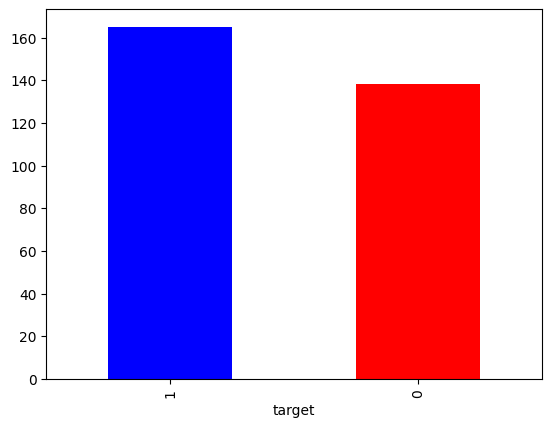

In [54]:
df.target.value_counts().plot(kind="bar", color=["blue","red"]) #untuk membuat diagram batang dari terget yang sering muncul

In [13]:
df.isna().sum() #digunakan untuk menghitung jumlah nilai null (NaN) dalam setiap kolom


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
categorical_val = [] #untuk menyimpan nama kolom yang dianggap kategori dan kontinu, secara berturut-turut
continous_val = []
for column in df.columns:
    print('===============================================================================')
    print(f"{column} : {df[column].unique()}") # mencetak nilai unik dari setiap kolom
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column) #Jika jumlah nilai unik dalam suatu kolom kurang dari atau sama dengan 10 (len(df[column].unique()) <= 10), maka kolom dianggap kategori dan nama kolom tersebut ditambahkan ke dalam list categorical_val. Jika jumlah nilai unik lebih dari 10, kolom dianggap kontinu, dan nama kolom ditambahkan ke dalam list continous_val

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [15]:
categorical_val # membedakan kolom-kolom yang dianggap kategori (categorical) dari yang dianggap kontinu (continuous) dalam suatu DataFrame

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

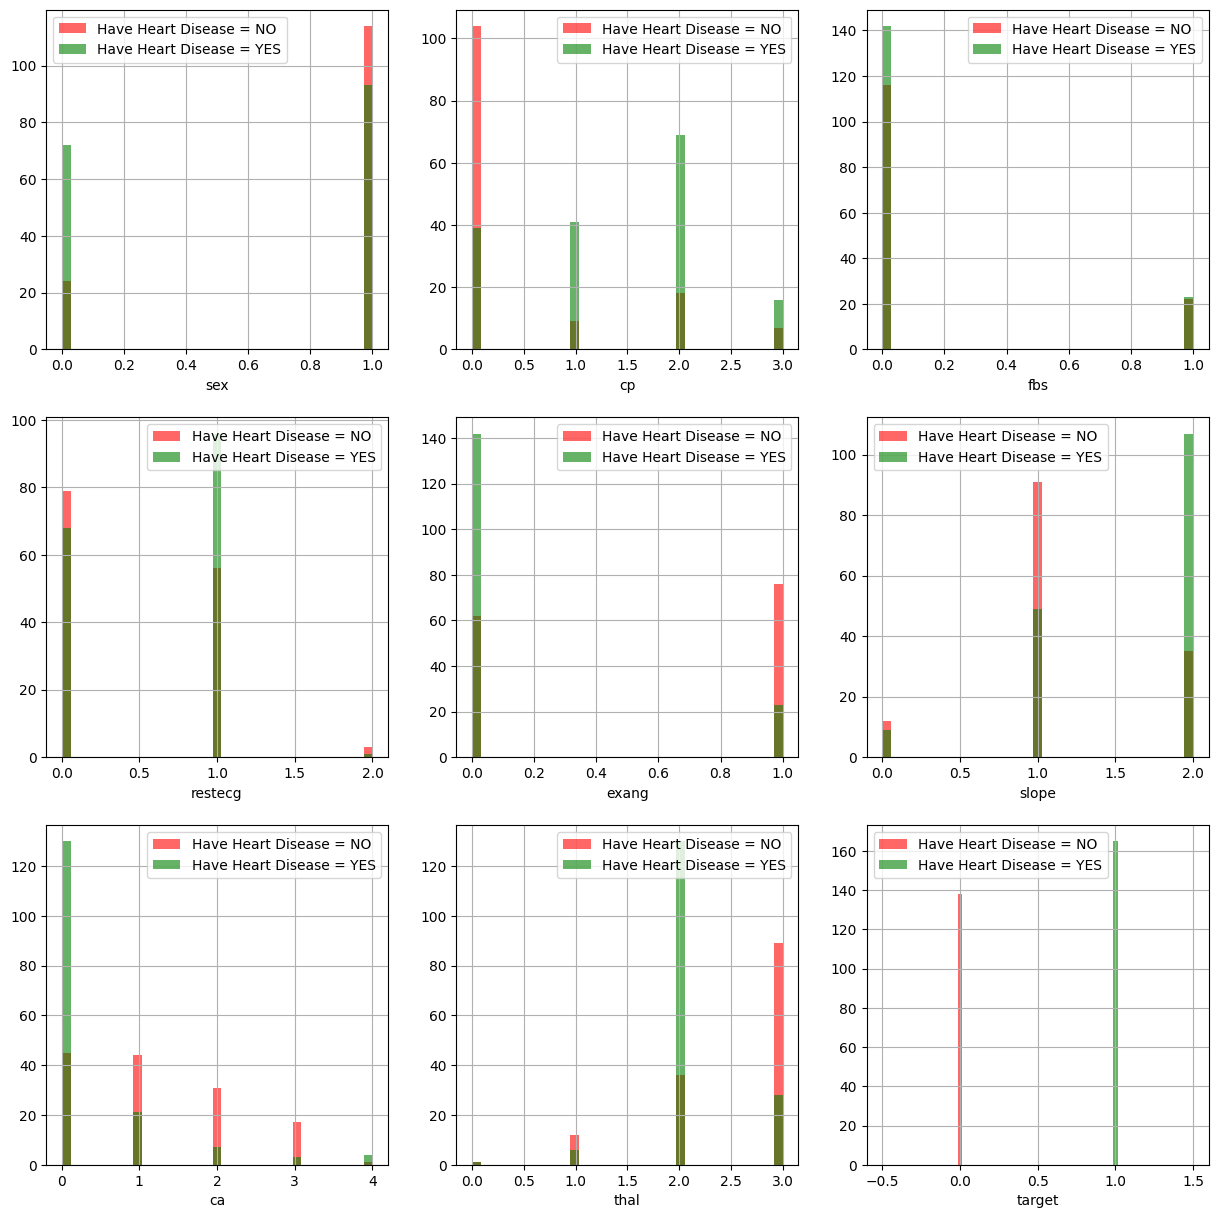

In [16]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='red', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='green', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column) # untuk membuat historigram dari 

# Usia vs. Denyut Jantung Maks untuk Penyakit Jantung


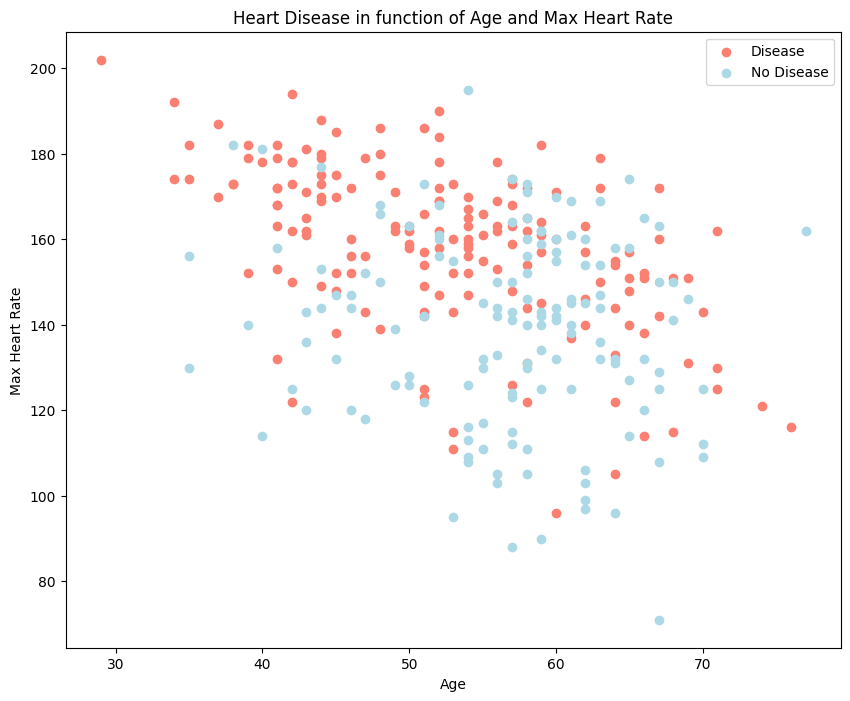

In [17]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

# * Korelasi dengan target

<Axes: title={'center': 'Correlation with target'}>

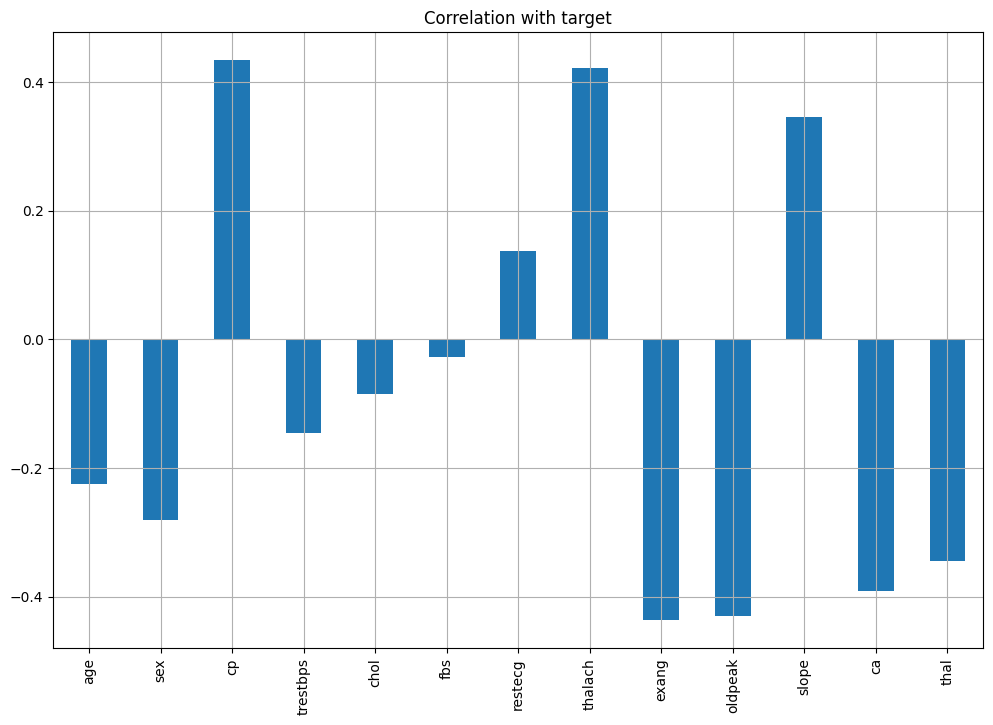

In [14]:
# digunakan untuk menghitung korelasi antara setiap kolom (kecuali kolom target) dengan kolom target
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

#  Data Processing
Setelah menjelajahi kumpulan data, kami mengamati bahwa kami perlu mengubah beberapa variabel kategori menjadi variabel dummy dan menskalakan semua nilai sebelum melatih model Machine Learning.

In [18]:
categorical_val.remove('target')#menghapus colom target
dataset = pd.get_dummies(df, columns = categorical_val)# kemudian membuat variabel dummy (one-hot encoding) untuk kolom-kolom kategori dalam DataFrame.

In [19]:
dataset.head()


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,37,130,250,187,3.50,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,41,130,204,172,1.40,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,56,120,236,178,0.80,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,57,120,354,163,0.60,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [20]:
print(df.columns)
print(dataset.columns)#mencetak nama kolom dalam DataFrame sebelum dan setelah proses pembuatan variabel dummy

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [21]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])#penskalaan fitur (feature scaling) pada beberapa kolom numerik dalam DataFrame dataset

In [22]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.95,0.76,-0.26,0.02,1.09,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.92,-0.09,0.07,1.63,2.12,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.47,-0.09,-0.82,0.98,0.31,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.18,-0.66,-0.20,1.24,-0.21,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.29,-0.66,2.08,0.58,-0.38,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


# 4. Menerapakan algoritma pemebelajran mesin KNN
 kami KLP 6 menggunakan K-nearest neighbours karena ini adalah algoritma sederhana yang menyimpan semua kasus yang tersedia dan mengklasifikasikan kasus baru berdasarkan ukuran kesamaan

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [24]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 87.18%
			Recall Score: 88.70%
			F1 score: 87.93%
_______________________________________________
Confusion Matrix: 
 [[ 82  15]
 [ 13 102]]

Test Result:
Accuracy Score: 86.81%
_______________________________________________
Classification Report:	Precision Score: 88.00%
			Recall Score: 88.00%
			F1 score: 88.00%
_______________________________________________
Confusion Matrix: 
 [[35  6]
 [ 6 44]]



In [26]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,86.79,86.81


# Penyetelan Hiperparameter
Sekarang kita telah melihat bahwa model tersebut over-fitting karena akurasi pengujiannya mencapai 100%..jadi kita harus menggunakan teknik hyperparamter sederhana seperti menentukan nilai k dan evaluasi

In [27]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))

Maximum KNN score on the test data: 100.00%


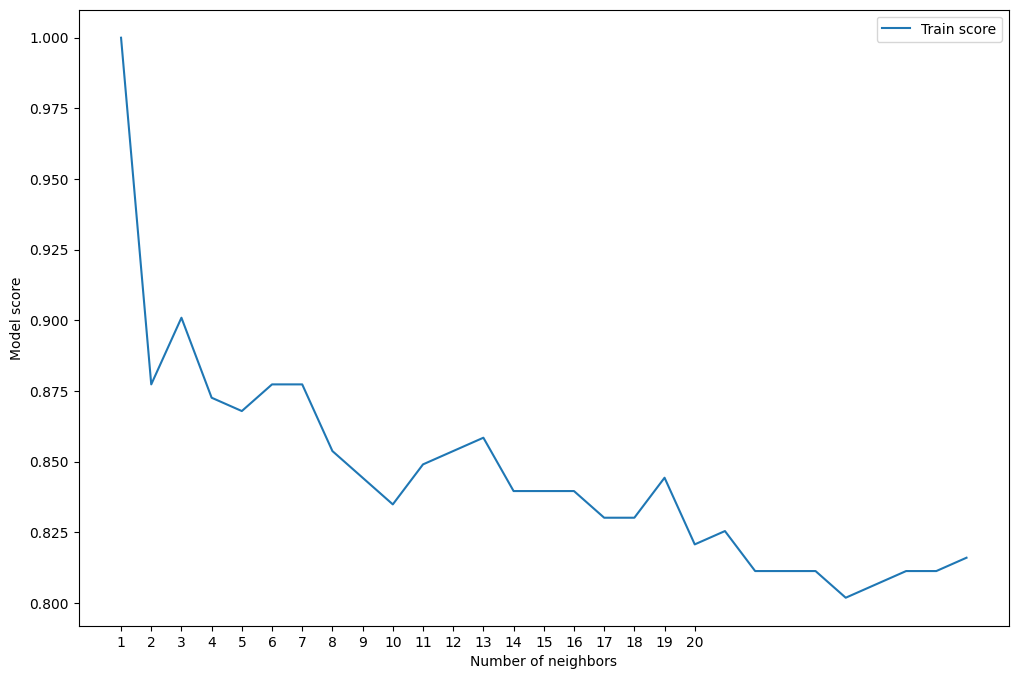

In [28]:
plt.figure(figsize=(12, 8))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")


In [36]:
knn_classifier = KNeighborsClassifier(n_neighbors=27)
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 81.13%
_______________________________________________
Classification Report:	Precision Score: 79.53%
			Recall Score: 87.83%
			F1 score: 83.47%
_______________________________________________
Confusion Matrix: 
 [[ 71  26]
 [ 14 101]]

Test Result:
Accuracy Score: 87.91%
_______________________________________________
Classification Report:	Precision Score: 86.79%
			Recall Score: 92.00%
			F1 score: 89.32%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 4 46]]



In [29]:
test_score = accuracy_score(y_test, knn_classifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_classifier.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned K-nearest neighbors,86.79,86.81


In [30]:
df. corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


In [31]:
df. dtypes #melihat tipe pada setiap atribut dan kelas nya


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [32]:
import pandas as pd

# Anggaplah ini adalah dataframe penyakit jantung yang sud
existing_heart_data = {
    'age': [63],
    'sex': [1],
    'cp': [3],
    'trestbps': [145],
    'chol': [233],
    'fbs': [1],
    'restecg': [0],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [1],
    'target': [1]
}

heart_df = pd.DataFrame(existing_heart_data)

# Data baru yang ingin ditambahkan
new_heart_data = {
    'age': [48],
    'sex': [1],
    'cp': [2],
    'trestbps': [145],
    'chol': [233],
    'fbs': [1],
    'restecg': [0],
    'thalach': [150],
    'exang': [0],
    'oldpeak': [2.3],
    'slope': [0],
    'ca': [0],
    'thal': [1],
    'target': [0]
}

# Buat dataframe baru dengan data baru
new_heart_df = pd.DataFrame(new_heart_data)

# Gabungkan dataframe baru dengan dataframe penyakit jantung yang sudah ada
heart_df = pd.concat([heart_df, new_heart_df], ignore_index=False)

# Melihat hasilnya
print(heart_df)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   
0   48    1   2       145   233    1        0      150      0     2.30      0   

   ca  thal  target  
0   0     1       1  
0   0     1       0  


In [33]:
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   
0   48    1   2       145   233    1        0      150      0     2.30      0   

   ca  thal  target  
0   0     1       1  
0   0     1       0  


In [34]:
# Menampilkan beberapa baris terbawah dataframe
print(heart_df.tail())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0     2.30      0   
0   48    1   2       145   233    1        0      150      0     2.30      0   

   ca  thal  target  
0   0     1       1  
0   0     1       0  


In [35]:
# Menampilkan informasi umum dataframe
print(heart_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 0
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2 non-null      int64  
 1   sex       2 non-null      int64  
 2   cp        2 non-null      int64  
 3   trestbps  2 non-null      int64  
 4   chol      2 non-null      int64  
 5   fbs       2 non-null      int64  
 6   restecg   2 non-null      int64  
 7   thalach   2 non-null      int64  
 8   exang     2 non-null      int64  
 9   oldpeak   2 non-null      float64
 10  slope     2 non-null      int64  
 11  ca        2 non-null      int64  
 12  thal      2 non-null      int64  
 13  target    2 non-null      int64  
dtypes: float64(1), int64(13)
memory usage: 240.0 bytes
None


In [36]:
# Memisahkan fitur (features) dan target
X = heart_df.drop('target', axis=1)  # Fitur
y = heart_df['target']  # Target


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [39]:
from sklearn.model_selection import train_test_split

# Menentukan fitur (X) dan target (y)
X = df.drop('target', axis=1)
y = df['target']

# Melakukan train-test split dengan proporsi 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

# Menampilkan jumlah data training dan test
print('Jumlah data training:', len(X_train))
print('Jumlah data test:', len(X_test))


Jumlah data training: 242
Jumlah data test: 61


In [40]:
from sklearn.neighbors import KNeighborsClassifier 
neigh=KNeighborsClassifier(n_neighbors=3, metric='euclidean')
neigh.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [41]:
y_pred = neigh.predict(X_test) #Baris ini memprediksi nilai target menggunakan model neigh pada data uji X_test dan hasilnya disimpan dalam variabel y_pred.

for pred, value in zip(y_pred[:5], X_test[:5]):
    print(f"value :   {value}   -   PREDICT : {pred} \n")
    #(Kemudian, dalam setiap iterasi, baris print mencetak nilai dan prediksi tersebut dengan format tertentu menggunakan f-string (formatted string).)

value :   age   -   PREDICT : 1 

value :   sex   -   PREDICT : 1 

value :   cp   -   PREDICT : 1 

value :   trestbps   -   PREDICT : 0 

value :   chol   -   PREDICT : 1 



In [ ]:
#penjelasan kode output di atas 
# ni berarti bahwa untuk pengamatan pertama dalam data uji, nilai dari kolom age adalah apa yang tercetak, dan model memprediksi bahwa orang ini memiliki penyakit jantung (PREDICT : 1).
#Proses ini diulangi untuk kolom cp, trestbps, dan chol, dan untuk setiap observasi dalam data uji. Harap dicatat bahwa output ini hanya memberikan gambaran sekilas dan tidak memberikan informasi tentang seberapa akurat atau andal model ini dalam melakukan prediksi

<Axes: >

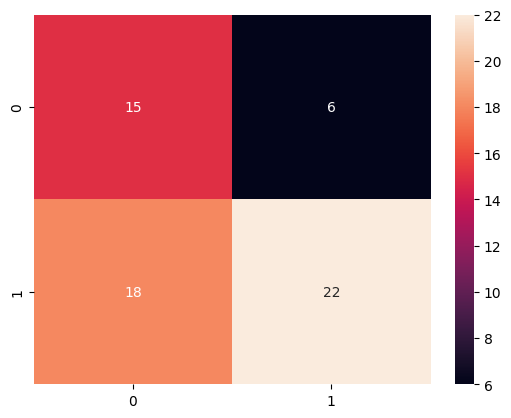

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy score:', accuracy_score(y_pred, y_test))
print('precission score:', precision_score(y_pred, y_test))
print('Recall score:', recall_score(y_pred, y_test))

Accuracy score: 0.6065573770491803
precission score: 0.55
Recall score: 0.7857142857142857


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.45      0.56        33
           1       0.55      0.79      0.65        28

    accuracy                           0.61        61
   macro avg       0.63      0.62      0.60        61
weighted avg       0.64      0.61      0.60        61



In [45]:
correlation_matrix = df.corr()

print(correlation_matrix)

           age   sex    cp  trestbps  chol   fbs  restecg  thalach  exang  \
age       1.00 -0.10 -0.07      0.28  0.21  0.12    -0.12    -0.40   0.10   
sex      -0.10  1.00 -0.05     -0.06 -0.20  0.05    -0.06    -0.04   0.14   
cp       -0.07 -0.05  1.00      0.05 -0.08  0.09     0.04     0.30  -0.39   
trestbps  0.28 -0.06  0.05      1.00  0.12  0.18    -0.11    -0.05   0.07   
chol      0.21 -0.20 -0.08      0.12  1.00  0.01    -0.15    -0.01   0.07   
fbs       0.12  0.05  0.09      0.18  0.01  1.00    -0.08    -0.01   0.03   
restecg  -0.12 -0.06  0.04     -0.11 -0.15 -0.08     1.00     0.04  -0.07   
thalach  -0.40 -0.04  0.30     -0.05 -0.01 -0.01     0.04     1.00  -0.38   
exang     0.10  0.14 -0.39      0.07  0.07  0.03    -0.07    -0.38   1.00   
oldpeak   0.21  0.10 -0.15      0.19  0.05  0.01    -0.06    -0.34   0.29   
slope    -0.17 -0.03  0.12     -0.12 -0.00 -0.06     0.09     0.39  -0.26   
ca        0.28  0.12 -0.18      0.10  0.07  0.14    -0.07    -0.21   0.12   

In [51]:
# Gantilah 'target_column' dengan nama kolom target yang menunjukkan keberadaan penyakit jantung
strongest_attributes = correlation_matrix['age'].abs().sort_values(ascending=False)

# Tampilkan atribut/fitur terstrong
print(strongest_attributes)


age        1.00
thalach    0.40
trestbps   0.28
ca         0.28
target     0.23
chol       0.21
oldpeak    0.21
slope      0.17
fbs        0.12
restecg    0.12
sex        0.10
exang      0.10
cp         0.07
thal       0.07
Name: age, dtype: float64


## .TERIMA KASIH
kelompok 6 data mining dengan judul project UAS classification data penyakit jantung(Heart Disease) menggunakan metode klasifikasi KNN
Anggota : 
        Syaikhul Muannas,
        M.murafi azis,
        Ridha al Fajri,
        Maihera Nabila,